# Homework

Merging compact objects produces a chirp signal in the gravitational wave detector.
Assume the chirp signal is 
\begin{equation}
y(t)=\begin{cases} sin(t^2) \quad 0<t<15 \\
0 \quad else\\
\end{cases}
\end{equation}

Please do wavelet transform to show the chirp signal is similar to the one you have seen
online. (Notice that the figure online has time as x-axis and frequency as the y-axis)
(You are welcome to use any wavelet you prefer.)


In [1]:
import numpy as np
def y(t):
    if t <15 and t> 0:
        return np.sin(t*t)
    else:
        return 0.

In [2]:
# Using Morlet Wavelet
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import *

ns=600
ntau=300

dstep=6./ns
sa = 0.001
sb = 6.001
sar=arange(sa+2*dstep,sb,dstep)
dtaustep=25./ntau
tauar=arange(0.,25.,dtaustep)
ystau=zeros((ns-2, ntau),complex)

tend = 20.
nt=600
dtstep=tend/nt
tar=arange(0.,tend,dtstep)


def mex(t):
    return (1-t*t)*exp(-t*t/2.)
    
def morlet(t,sigma):
    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    return psi
def func(t):
    return morlet(t,1.)
yarr=zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=y(tar[idext])
    for idexs in range(ns-2):
        for idextau in range(ntau):
            ystau[idexs,idextau]=1./sqrt(sar[idexs])*sum(conjugate(func((tar-tauar[idextau])/sar[idexs]))*yarr)*dtstep

wavelet()

In [3]:
ystau = np.flip(ystau,axis = 0)
ys = np.abs(ystau)**2
freq = np.flip(2*np.pi/sar,axis = 0)

In [4]:
X,Y = np.meshgrid(tauar,freq)

Compute Power Spectrum (Absolute Valued Squared Coefficents), with y axis being the frequency and x axis being time

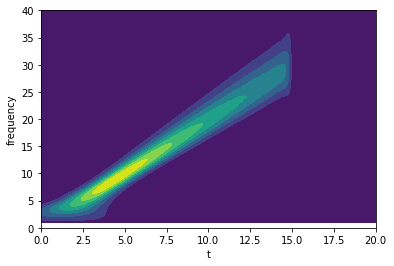

In [5]:
plt.xlabel('t')
plt.ylabel('frequency')
plt.ylim(0.0,40)
plt.xlim(0,tend)
plt.contourf(X,Y,ys)